In [21]:
pip install -U vectorbt


   ---------------------------------------- 0.0/527.6 kB ? eta -:--:--
   --- ----------------------------------- 41.0/527.6 kB 991.0 kB/s eta 0:00:01
   ---------- ----------------------------- 133.1/527.6 kB 2.0 MB/s eta 0:00:01
   ------------------------ --------------- 327.7/527.6 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  522.2/527.6 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 527.6/527.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: vectorbt
    Found existing installation: vectorbt 0.26.2
    Uninstalling vectorbt-0.26.2:
      Successfully uninstalled vectorbt-0.26.2


In [33]:
result_df

,RI,Target Position,Orders,Price
2022-01-01,73.719826,4,4.0,100.000000
2022-01-02,-55.280832,-3,-7.0,100.505051
2022-01-03,92.644508,5,8.0,101.010101
2022-01-04,-97.569105,-5,-10.0,101.515152
2022-01-05,93.975765,5,10.0,102.020202
...,...,...,...,...
2022-04-06,-72.725705,-4,-1.0,147.979798
2022-04-07,-97.091067,-5,-1.0,148.484848
2022-04-08,-29.882488,-2,3.0,148.989899
2022-04-09,17.983537,1,3.0,149.494949


策略統計數據：
Start                               2022-01-01 00:00:00
End                                 2022-04-10 00:00:00
Period                                100 days 00:00:00
Start Value                                  50000000.0
End Value                               50218181.818182
Total Return [%]                               0.436364
Benchmark Return [%]                               15.0
Max Gross Exposure [%]                        44.579473
Total Fees Paid                                     0.0
Max Drawdown [%]                                0.36075
Max Drawdown Duration                  26 days 00:00:00
Total Trades                                         62
Total Closed Trades                                  61
Total Open Trades                                     1
Open Trade PnL                            -48484.848485
Win Rate [%]                                  57.377049
Best Trade [%]                                 0.690276
Worst Trade [%]                         

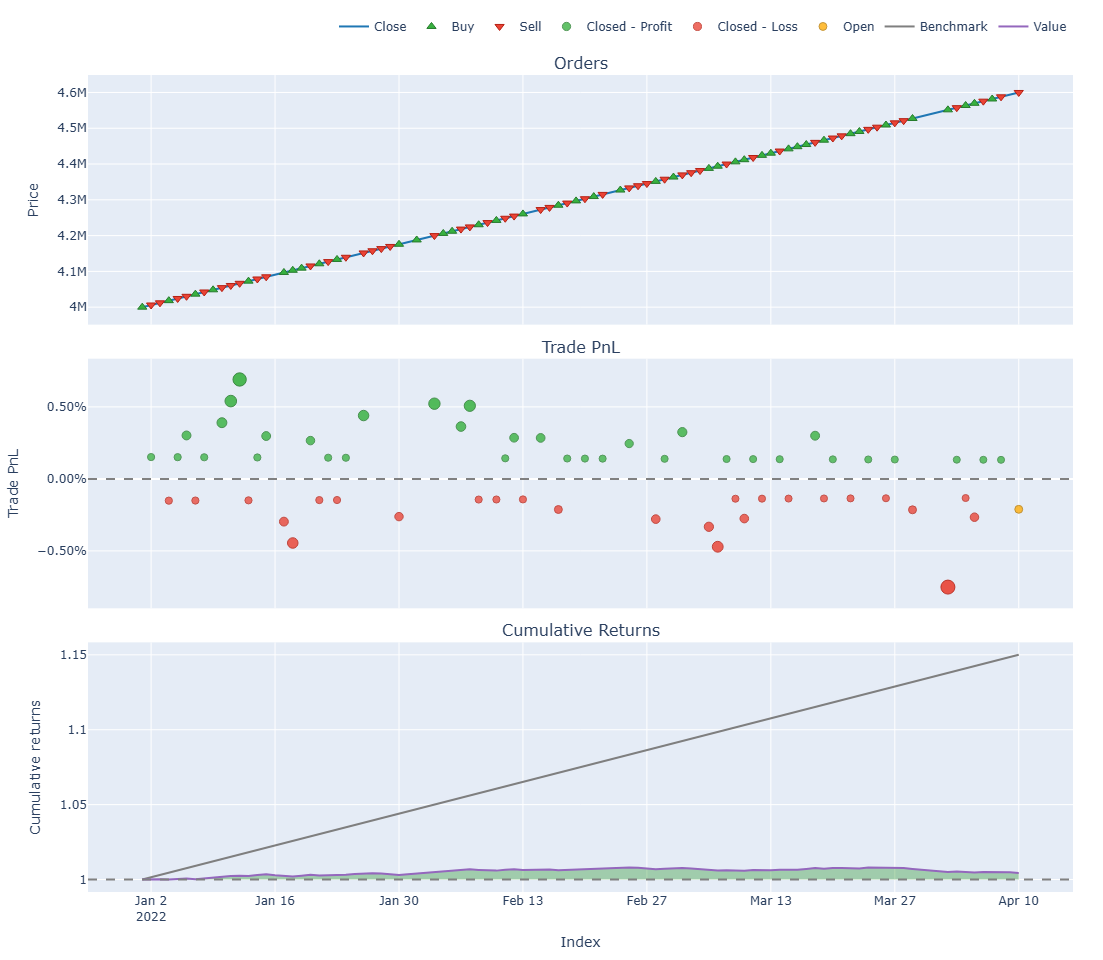


策略過程數據：
                   RI  Target Position  Orders         Price
2022-01-01  39.632343                2     2.0  4.000000e+06
2022-01-02   7.219273                0    -2.0  4.006061e+06
2022-01-03 -38.094477               -2    -2.0  4.012121e+06
2022-01-04  62.759004                4     6.0  4.018182e+06
2022-01-05  36.946235                2    -2.0  4.024242e+06
2022-01-06 -67.476612               -4    -6.0  4.030303e+06
2022-01-07  82.185437                5     9.0  4.036364e+06
2022-01-08  64.507449                4    -1.0  4.042424e+06
2022-01-09  89.959983                5     1.0  4.048485e+06
2022-01-10  45.143902                3    -2.0  4.054545e+06


In [12]:
import numpy as np
import pandas as pd
import vectorbt as vbt

# 定義一個函數，根據 RI 值回傳目標持倉
def get_target_position(ri):
    if 10 <= ri < 20:
        return 1
    elif 20 <= ri < 40:
        return 2
    elif 40 <= ri < 60:
        return 3
    elif 60 <= ri < 80:
        return 4
    elif 80 <= ri <= 100:
        return 5
    elif -20 <= ri < -10:
        return -1
    elif -40 <= ri < -20:
        return -2
    elif -60 <= ri < -40:
        return -3
    elif -80 <= ri < -60:
        return -4
    elif -100 <= ri < -80:
        return -5
    else:
        return 0

# 模擬日期資料
dates = pd.date_range("2022-01-01", periods=100, freq="D")

# 假設我們有一個 RI 的時間序列（此處模擬數據，實際上請根據你的計算來產生）
# 例如隨機產生 -120 ~ 120 的數字
ri_series = pd.Series(np.random.uniform(-100, 100, size=100), index=dates)

# 根據 RI 計算每個時點的目標持倉
target_positions = ri_series.apply(get_target_position)

# 計算每個時點需要下單的單位
# 也就是當前目標持倉與前一期持倉的差異
orders = target_positions.diff().fillna(target_positions)

# 模擬價格數據（例如：線性上升的價格）
close = pd.Series(np.linspace(20000, 23000, 100), index=dates)*200

# 利用 vectorbt 依據 orders 進行回測
pf = vbt.Portfolio.from_orders(close,
                               size=orders,
                               freq="D",
                               init_cash = 50000000
                              )

# 輸出策略統計資料，檢查結果
print("策略統計數據：")
print(pf.stats())
pf.plot(width=1100).show()
# 如果想觀察下單訊號與目標持倉變化，可以印出相關數據
result_df = pd.DataFrame({
    "RI": ri_series,
    "Target Position": target_positions,
    "Orders": orders,
    "Price": close
})
print("\n策略過程數據：")
print(result_df.head(10))


In [13]:
import numpy as np
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100, freq="D")

# 建立隨機 RI
ri_series = pd.Series(np.random.uniform(-100, 100, len(dates)), index=dates)

# 根據 RI 得到目標持倉
def get_target_position(ri):
    if 10 <= ri < 20:
        return 1
    elif 20 <= ri < 40:
        return 2
    elif 40 <= ri < 60:
        return 3
    elif 60 <= ri < 80:
        return 4
    elif 80 <= ri <= 100:
        return 5
    elif -20 <= ri < -10:
        return -1
    elif -40 <= ri < -20:
        return -2
    elif -60 <= ri < -40:
        return -3
    elif -80 <= ri < -60:
        return -4
    elif -100 <= ri < -80:
        return -5
    else:
        return 0

target_positions = ri_series.apply(get_target_position)

# orders (今天目標持倉 - 昨天目標持倉)
orders = target_positions.diff().fillna(target_positions)

# 模擬收盤價
close_prices = np.linspace(20000, 23000, len(dates))

df = pd.DataFrame({
    'datetime': dates,
    'close': close_prices
}).set_index('datetime')
df['open'] = df['close']
df['high'] = df['close']
df['low'] = df['close']
df['volume'] = 0  # 這裡沒用到，也要給個欄位
class RITestStrategy(bt.Strategy):
    params = (
        ('point_value', 200),   # 1點 = 200元
        ('leverage', 16),       # 槓桿 16
    )
    
    def __init__(self):
        # 準備容器來存放我們的目標持倉
        self.data_close = self.datas[0].close
        # 將 target_positions 與 orders 先存成 dict，key 為日期
        self.target_pos_dict = target_positions.to_dict()
    
    def next(self):
        current_date = self.datas[0].datetime.date(0)
        # 取得今日目標持倉
        tgt = self.target_pos_dict.get(current_date, 0)
        
        # 目前倉位(張數) - backtrader 的 size 是「股數」或「合約數」(對應我們的“張”)
        current_size = self.getposition(self.datas[0]).size
        
        # 若目標倉位與目前倉位不同，則做調整
        diff = tgt - current_size
        if diff != 0:
            # 直接市場單進出 diff 張
            # 如果 diff > 0 → buy(diff)
            # 如果 diff < 0 → sell(abs(diff))
            if diff > 0:
                self.buy(size=diff)
            else:
                self.sell(size=abs(diff))

# backtrader feed 需要有 datetime 欄或 index
# 這裡我們已把 datetime 當作 index
# 建立 backtrader feed
data_feed = bt.feeds.PandasData(dataname=df)

cerebro = bt.Cerebro()

# 加入我們的資料
cerebro.adddata(data_feed)

# 加入策略
cerebro.addstrategy(RITestStrategy)

# 假設初始資金 1,000 萬
cerebro.broker.set_cash(10_000_000)

# 模擬手續費 or 保證金
# 這裡為簡化就不特別設置，預設 commission=0
# 若要強制槓桿 16，需透過 cerebro.broker.setcommission、set_margin... 等參數細調
# 這裡僅示意
cerebro.broker.setcommission(commission=0.0, margin=1)

# 執行回測
print(f"初始資金: {cerebro.broker.getvalue():.2f}")
results = cerebro.run()
print(f"最終資金: {cerebro.broker.getvalue():.2f}")

# 直接輸出 backtrader 內建的分析
# 但要得到更豐富的統計(類似 vectorbt.stats) 可能需要添加 Analyzer
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')

strat = results[0]
drawdown = strat.analyzers.drawdown.get_analysis()
returns = strat.analyzers.returns.get_analysis()
trade_analyzer = strat.analyzers.trade_analyzer.get_analysis()

# 印出一些指標
print("Sharpe Ratio:", sharpe.get('sharperatio', None))
print("Max DrawDown %:", drawdown['max']['drawdown'])
print("Annual Return:", returns['ravg'])       # or 'rnorm' (annualized)
print("Total Trades:", trade_analyzer.total.closed)
print("Win Streak:", trade_analyzer.streak.won.longest)
# ...等，依照需要再挖更深

# backtrader 內建繪圖:
cerebro.plot()


初始資金: 10000000.00
最終資金: 10000000.00


AttributeError: 'ItemCollection' object has no attribute 'drawdown'

In [3]:
import numpy as np
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt

# ===== 1) 準備資料 =====
np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100, freq="D")

def get_target_position(ri):
    if 10 <= ri < 20:
        return 1
    elif 20 <= ri < 40:
        return 2
    elif 40 <= ri < 60:
        return 3
    elif 60 <= ri < 80:
        return 4
    elif 80 <= ri <= 100:
        return 5
    elif -20 <= ri < -10:
        return -1
    elif -40 <= ri < -20:
        return -2
    elif -60 <= ri < -40:
        return -3
    elif -80 <= ri < -60:
        return -4
    elif -100 <= ri < -80:
        return -5
    else:
        return 0

ri_series = pd.Series(np.random.uniform(-100, 100, len(dates)), index=dates)
target_positions = ri_series.apply(get_target_position)
orders = target_positions.diff().fillna(target_positions)

close_prices = np.linspace(20000, 23000, len(dates))
df = pd.DataFrame({
    'datetime': dates,
    'close': close_prices,
}).set_index('datetime')
df['open'] = df['close']
df['high'] = df['close']
df['low'] = df['close']
df['volume'] = 0

# ===== 2) 建立策略 =====
class RITestStrategy(bt.Strategy):
    params = (('point_value', 200), ('leverage', 16),)
    
    def __init__(self):
        self.target_pos_dict = target_positions.to_dict()
    
    def next(self):
        current_date = self.datas[0].datetime.date(0)
        tgt = self.target_pos_dict.get(current_date, 0)
        current_size = self.getposition(self.datas[0]).size
        
        diff = tgt - current_size
        if diff > 0:
            self.buy(size=diff)
        elif diff < 0:
            self.sell(size=abs(diff))

# ===== 3) 建立 Cerebro，先加入 Analyzer，再 run =====
cerebro = bt.Cerebro()

# 指定資料的 timeframe=Days, compression=1
data_feed = bt.feeds.PandasData(
    dataname=df,
    timeframe=bt.TimeFrame.Days,
    compression=1
)
cerebro.adddata(data_feed)

cerebro.addstrategy(RITestStrategy)

# 假設初始資金 1,000 萬
cerebro.broker.set_cash(10_000_000)

# 可視需要設定 commission/margin 來模擬槓桿
cerebro.broker.setcommission(commission=0.0, margin=1)

# 在 run() 前加入分析器
cerebro.addanalyzer(bt.analyzers.SharpeRatio,
                    _name='sharpe',
                    timeframe=bt.TimeFrame.Days,
                    compression=1,
                    annualize=True,
                    riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')

print(f"初始資金: {cerebro.broker.getvalue():.2f}")

# 執行回測 (注意 analyzers 要在 run 前添加)
results = cerebro.run()

print(f"最終資金: {cerebro.broker.getvalue():.2f}")

# ===== 4) 取出分析器結果 =====
strat = results[0]

# Sharpe
sharpe_analysis = strat.analyzers.sharpe.get_analysis()
sharpe_ratio = sharpe_analysis.get('sharperatio', None)

# DrawDown
drawdown = strat.analyzers.drawdown.get_analysis()

# Returns
returns = strat.analyzers.returns.get_analysis()

# Trade Analyzer
trade_analyzer = strat.analyzers.trade_analyzer.get_analysis()

# AnnualReturn (如果需要)
annual_ret = strat.analyzers.annual_return.get_analysis()

# 印出部分指標
print("Sharpe Ratio:", sharpe_ratio)
print("Max DrawDown %:", drawdown['max']['drawdown'])
print("Annual Return(s):", annual_ret)  # 這個會是逐年字典
print("Total Trades:", trade_analyzer.total.closed)

# ===== 5) 繪圖 =====
cerebro.plot(iplot=False)  # 也可改 iplot=True 看互動視窗


初始資金: 10000000.00
最終資金: 10000000.00
Sharpe Ratio: None
Max DrawDown %: 0.0
Annual Return(s): OrderedDict({2022: 0.0})


KeyError: 

In [1]:
import backtrader as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 範例資料：100 天，每天價格略有隨機波動
np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100, freq="D")
close_prices = np.linspace(100, 110, len(dates)) + np.random.normal(0, 1, len(dates))

df = pd.DataFrame({
    'datetime': dates,
    'close': close_prices,
    'open': close_prices,
    'high': close_prices,
    'low': close_prices,
    'volume': 0
}).set_index('datetime')

# 策略：每個 bar 都買 10 股，示範產生一些交易
class TestStrategy(bt.Strategy):
    def next(self):
        # 簡單買入 10 股，如果還沒有部位
        if not self.position:
            self.buy(size=10)

cerebro = bt.Cerebro()

# 關鍵：指定 timeframe=Days, compression=1
data_feed = bt.feeds.PandasData(
    dataname=df,
    timeframe=bt.TimeFrame.Days,
    compression=1
)
cerebro.adddata(data_feed)
cerebro.addstrategy(TestStrategy)
cerebro.broker.setcash(1000000)

# 加入 SharpeRatio 分析器
cerebro.addanalyzer(
    bt.analyzers.SharpeRatio,
    _name='sharpe',
    timeframe=bt.TimeFrame.Days,
    compression=1,
    annualize=True,
    riskfreerate=0.0
)

results = cerebro.run()
strat = results[0]

sharpe_analysis = strat.analyzers.sharpe.get_analysis()
print("Sharpe Ratio =", sharpe_analysis)

final_value = cerebro.broker.getvalue()
print("Final Portfolio Value:", final_value)

# 繪圖（若需要）
cerebro.plot(iplot=False)


Sharpe Ratio = OrderedDict({'sharperatio': 1.2076893553575754})
Final Portfolio Value: 1000098.0266706679


[[<Figure size 992x600 with 4 Axes>]]

In [19]:
import datetime
import pandas as pd
import numpy as np
import backtrader as bt

# ========== (A) 準備示範用資料 ==========
# 產生日期索引
dates = pd.date_range('2021-01-01', periods=100, freq='D')
# 隨機產生 close 價
np.random.seed(42)
close_prices = np.random.uniform(100, 200, size=len(dates))

# 隨機產生 RI (介於 -100 ~ 100)
ri_values = np.random.randint(-100, 101, size=len(dates))

# 將上述組成 DataFrame (至少要有 open/high/low/close/volume 欄位)
# 這裡簡單直接都用 close 當作 OHLC
data_df = pd.DataFrame({
    'datetime': dates,
    'open': close_prices,
    'high': close_prices,
    'low': close_prices,
    'close': close_prices,
    'volume': np.random.randint(100, 200, size=len(dates)),  # 隨機 volume
    'RI': ri_values
})
data_df.set_index('datetime', inplace=True)

# ========== (B) 建立 Backtrader 數據 (DataFeed) ==========
# Backtrader 預設的 PandasData 不知道 "RI" 欄位，所以要自訂一個資料來源類別
# 讓我們能在 Strategy 中存取 data.RI
class PandasData_Extend(bt.feeds.PandasData):
    # 添加新的 line 'ri'，並指定其對應到 dataframe 裏的 'RI' 欄位 (注意大小寫)
    lines = ('ri',)
    params = (
        ('ri', 5),  # 對應到 dataframe 第幾個欄位，0-based: O/H/L/C/V => 0/1/2/3/4 => 'RI'是第6欄
    )

# 將 data_df 轉成 Backtrader 的 feed
data_feed = PandasData_Extend(dataname=data_df,
                              fromdate=data_df.index[0],
                              todate=data_df.index[-1],
                              timeframe=bt.TimeFrame.Days)

# ========== (C) 定義策略 Strategy ==========
class RIBasedStrategy(bt.Strategy):
    # 您可在 params 設定一些可調參數
    params = dict(
        printlog=True  # 是否打印交易訊息
    )

    def log(self, txt, dt=None):
        """ 輔助列印函式 """
        if self.params.printlog:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()} {txt}')

    def ri_to_position(self, ri):
        """根據 RI 的數值，回傳『目標持倉大小』(可正可負)"""
        # 多頭
        if 10 <= ri < 20:
            return 1
        elif 20 <= ri < 40:
            return 2
        elif 40 <= ri < 60:
            return 3
        elif 60 <= ri < 80:
            return 4
        elif 80 <= ri <= 100:
            return 5

        # 空頭
        elif -20 >= ri > -30:
            return -1
        elif -40 >= ri > -20:
            return -2
        elif -60 >= ri > -40:
            return -3
        elif -80 >= ri > -60:
            return -4
        elif -100 <= ri <= -80:
            return -5

        # 其他區間 => 0 (不持倉)
        return 0

    def next(self):
        """每根 Bar 都會呼叫一次"""
        current_ri = self.datas[0].ri[0]  # 取得當前 bar 的 RI 值
        target_size = self.ri_to_position(current_ri)
        current_pos = self.position.size  # 目前已持有的頭寸 (正=多頭 / 負=空頭 / 0=無)

        if target_size != current_pos:
            # 我們用 order_target_size 把最終持倉調整到 target_size
            self.order_target_size(target=target_size)
            self.log(f'RI={current_ri:.2f}, 調整持倉 -> {target_size}')

    def stop(self):
        """ 回測結束時可在這裡輸出結果 """
        self.log("回測結束。")


# ========== (D) 建立 Cerebro、加入策略 & 資料，執行回測 ==========
cerebro = bt.Cerebro()

# 加入策略
cerebro.addstrategy(RIBasedStrategy)

# 加入 DataFeed
cerebro.adddata(data_feed)

# 初始資金
cerebro.broker.setcash(100000.0)

# 假設設定佣金 (單向 0.1%)
cerebro.broker.setcommission(commission=0.001)

# 執行回測
cerebro.run()

# ========== (E) 查看最終資金、畫圖 ==========
final_value = cerebro.broker.getvalue()
print(f'Final Portfolio Value: {final_value:.2f}')

# 如果在本地端 (Jupyter / Python 腳本) 執行，可以呼叫以下繪圖
# 會彈出一個 matplotlib 視窗顯示回測結果 (含買賣箭頭)
cerebro.plot(iplot=False)



2021-01-05 RI=31.00, 調整持倉 -> 2
2021-01-06 RI=50.00, 調整持倉 -> 3
2021-01-08 RI=70.00, 調整持倉 -> 4
2021-01-09 RI=-72.00, 調整持倉 -> 0
2021-01-11 RI=-88.00, 調整持倉 -> -5
2021-01-12 RI=59.00, 調整持倉 -> 3
2021-01-13 RI=-30.00, 調整持倉 -> 0
2021-01-14 RI=86.00, 調整持倉 -> 5
2021-01-15 RI=-15.00, 調整持倉 -> 0
2021-01-18 RI=69.00, 調整持倉 -> 4
2021-01-19 RI=-56.00, 調整持倉 -> 0
2021-01-21 RI=84.00, 調整持倉 -> 5
2021-01-22 RI=33.00, 調整持倉 -> 2
2021-01-23 RI=-73.00, 調整持倉 -> 0
2021-01-29 RI=89.00, 調整持倉 -> 5
2021-01-30 RI=-26.00, 調整持倉 -> -1
2021-01-31 RI=27.00, 調整持倉 -> 2
2021-02-01 RI=-9.00, 調整持倉 -> 0
2021-02-02 RI=89.00, 調整持倉 -> 5
2021-02-03 RI=28.00, 調整持倉 -> 2
2021-02-05 RI=-74.00, 調整持倉 -> 0
2021-02-06 RI=89.00, 調整持倉 -> 5
2021-02-07 RI=20.00, 調整持倉 -> 2
2021-02-08 RI=15.00, 調整持倉 -> 1
2021-02-09 RI=-98.00, 調整持倉 -> -5
2021-02-10 RI=2.00, 調整持倉 -> 0
2021-02-11 RI=97.00, 調整持倉 -> 5
2021-02-13 RI=54.00, 調整持倉 -> 3
2021-02-14 RI=36.00, 調整持倉 -> 2
2021-02-15 RI=-39.00, 調整持倉 -> 0
2021-02-16 RI=64.00, 調整持倉 -> 4
2021-02-17 RI=-50.00, 調整持倉 

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]